In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import ast

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# 加载数据
df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\sampled_dataset.csv')

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')

# 目标变量
y = df['Churn'].values
y = to_categorical(y)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建模型
model = Sequential()
model.add(Embedding(input_dim=200, output_dim=40))  # 移除 input_length
model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
model.add(Dropout(0.2))  # 添加 Dropout
model.add(BatchNormalization())  # 添加 BatchNormalization
model.add(LSTM(50, return_sequences=False))
model.add(Dense(2, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 早停
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 训练模型，包括早停回调
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

# 测试模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 预测类别
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 计算其他指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')


Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7985 - loss: 0.4278 - val_accuracy: 0.8329 - val_loss: 0.5833
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8112 - loss: 0.3629 - val_accuracy: 0.8343 - val_loss: 0.3882
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8241 - loss: 0.3472 - val_accuracy: 0.8371 - val_loss: 0.3297
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8221 - loss: 0.3511 - val_accuracy: 0.8371 - val_loss: 0.3295
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8327 - loss: 0.3351 - val_accuracy: 0.8371 - val_loss: 0.3286
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8172 - loss: 0.3478 - val_accuracy: 0.8371 - val_loss: 0.3282
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8217 - loss: 0.3454 - val_accuracy: 0.8371 - val_loss: 0.3263
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8373 - loss: 0.3300 - val_accuracy: 0.

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import ast

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# 加载数据
# df = pd.read_csv('your_data.csv')  # 替换为你的文件路径
df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\sampled_dataset.csv')

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')

# 目标变量
y = df['Churn'].values
y = to_categorical(y)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建模型
#model = Sequential()
#model.add(Embedding(input_dim=100, output_dim=20, input_length=early_window))  # 调整 input_dim
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(2, activation='softmax'))

# 编译模型
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model = Sequential()
model.add(Embedding(input_dim=200, output_dim=40))  # 增加 input_dim 和 output_dim
model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
model.add(Dropout(0.2))  # 添加 Dropout
model.add(BatchNormalization())  # 添加 BatchNormalization
model.add(LSTM(50, return_sequences=False))
model.add(Dense(2, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 早停
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 训练模型，包括早停回调
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])


# 测试模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7856 - loss: 0.4261 - val_accuracy: 0.8371 - val_loss: 0.5733
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8314 - loss: 0.3397 - val_accuracy: 0.8357 - val_loss: 0.4017
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8143 - loss: 0.3571 - val_accuracy: 0.8371 - val_loss: 0.3289
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8262 - loss: 0.3426 - val_accuracy: 0.8371 - val_loss: 0.3246
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8212 - loss: 0.3545 - val_accuracy: 0.8371 - val_loss: 0.3257
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8285 - loss: 0.3416 - val_accuracy: 0.8371 - val_loss: 0.3209
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8214 - loss: 0.3414 - val_accuracy: 0.8343 - val_loss: 0.3283
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8257 - loss: 0.3450 - val_acc

In [ ]:
# 调整模型结构
model = Sequential()
model.add(Embedding(input_dim=200, output_dim=40, input_length=early_window))  # 增加 input_dim 和 output_dim
model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
model.add(Dropout(0.2))  # 添加 Dropout
model.add(BatchNormalization())  # 添加 BatchNormalization
model.add(LSTM(50, return_sequences=False))
model.add(Dense(2, activation='softmax'))

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 早停
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 训练模型，包括早停回调
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
197/197 [==============================] - 9s 22ms/step - loss: 0.2421 - accuracy: 0.9140 - val_loss: 0.3578 - val_accuracy: 0.9129
Epoch 2/50
197/197 [==============================] - 3s 17ms/step - loss: 0.2112 - accuracy: 0.9205 - val_loss: 0.2387 - val_accuracy: 0.9186
Epoch 3/50
197/197 [==============================] - 3s 13ms/step - loss: 0.2045 - accuracy: 0.9263 - val_loss: 0.1757 - val_accuracy: 0.9400
Epoch 4/50
197/197 [==============================] - 3s 14ms/step - loss: 0.2020 - accuracy: 0.9279 - val_loss: 0.1761 - val_accuracy: 0.9457
Epoch 5/50
197/197 [==============================] - 4s 20ms/step - loss: 0.1960 - accuracy: 0.9284 - val_loss: 0.1749 - val_accuracy: 0.9457
Epoch 6/50
197/197 [==============================] - 7s 34ms/step - loss: 0.1939 - accuracy: 0.9306 - val_loss: 0.1726 - val_accuracy: 0.9471
Epoch 7/50
197/197 [==============================] - 4s 20ms/step - loss: 0.1946 - accuracy: 0.9306 - val_loss: 0.1753 - val_accuracy: 0.9457

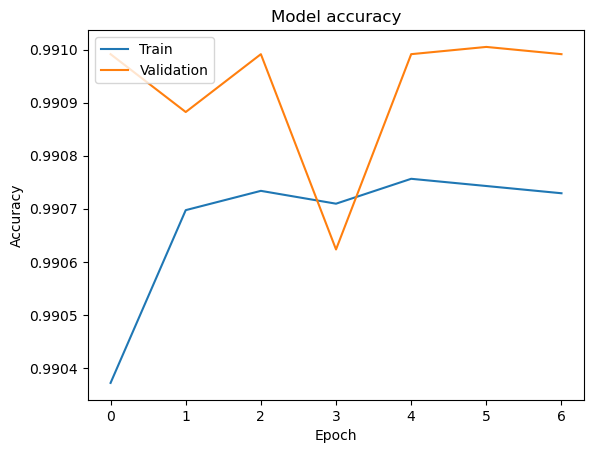

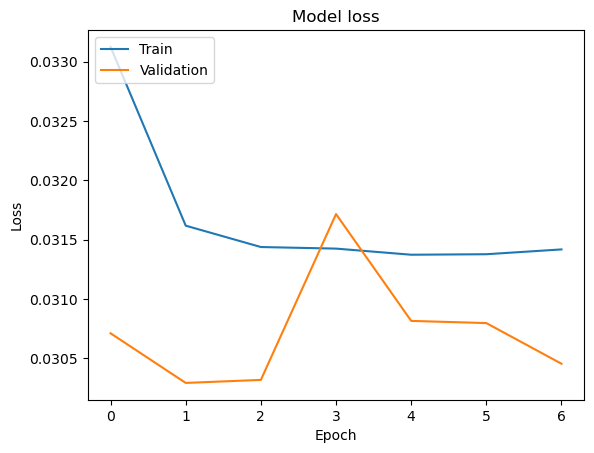

In [5]:
# Plotting training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


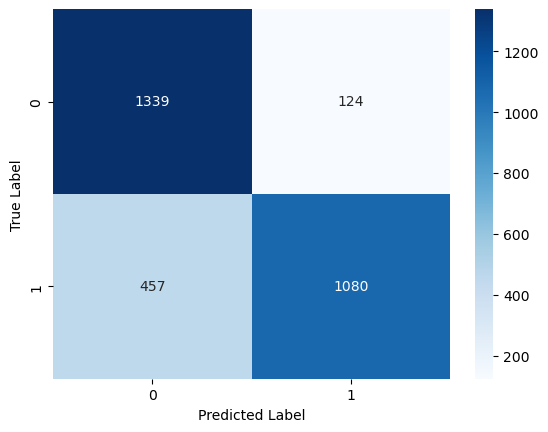

              precision    recall  f1-score   support

           0       0.75      0.92      0.82      1463
           1       0.90      0.70      0.79      1537

    accuracy                           0.81      3000
   macro avg       0.82      0.81      0.80      3000
weighted avg       0.82      0.81      0.80      3000



In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc

# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes, average='binary')
recall = recall_score(y_true, y_pred_classes, average='binary')
f1 = f1_score(y_true, y_pred_classes, average='binary')
micro_f1 = f1_score(y_true, y_pred_classes, average='micro')  # 计算微平均 F1 分数
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Micro F1 Score: {micro_f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")




9827/9827 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
Precision: 0.8330
Recall: 0.1320
F1 Score: 0.2279
Micro F1 Score: 0.9908
Matthews Correlation Coefficient: 0.3295
Accuracy: 0.9908
AUC: 0.9524
PR AUC: 0.4209


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]

# 计算微平均精确度
micro_precision = precision_score(y_true, y_pred_classes, average='micro')

# 计算微平均召回率
micro_recall = recall_score(y_true, y_pred_classes, average='micro')

# 计算微平均 F1 分数
micro_f1 = f1_score(y_true, y_pred_classes, average='micro')

# 打印度量指标
print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1 Score: {micro_f1:.4f}")


Micro Precision: 0.9908
Micro Recall: 0.9908
Micro F1 Score: 0.9908


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


AUC: 0.9129


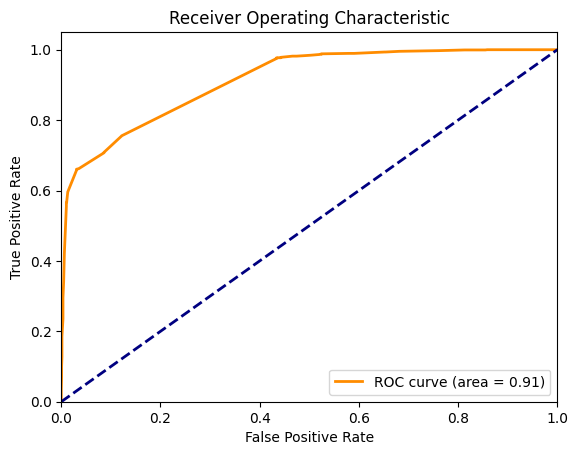

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 假设 y_true 是您的真实标签和 y_pred_probs 是模型预测的概率
# 例如：y_true = [0, 1, 1, 0, 1] 和 y_pred_probs = [0.1, 0.9, 0.8, 0.3, 0.7]

# 计算AUC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC: {auc:.4f}")

# 计算ROC曲线的坐标
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
!pip install --upgrade shap tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
188/188 ━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━

C:\Users\ycw\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\ycw\AppData\Local\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


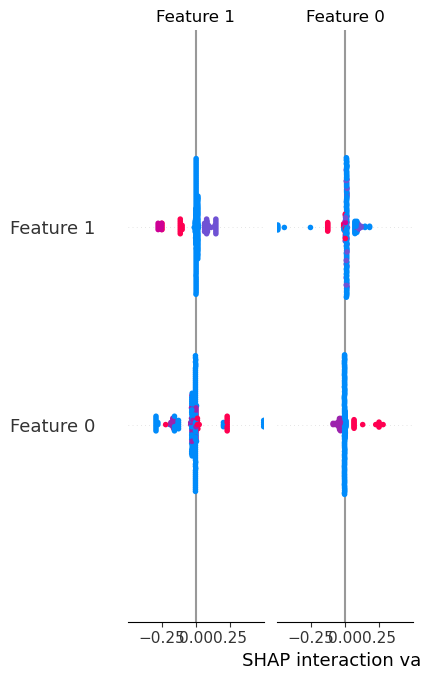

In [4]:
import shap

# SHAP
data_for_shap = X_train[:200]  # 选取前 1000 个样本

# KernelExplainer
explainer = shap.KernelExplainer(model.predict, data_for_shap)

# Calculate
shap_values = explainer.shap_values(data_for_shap)


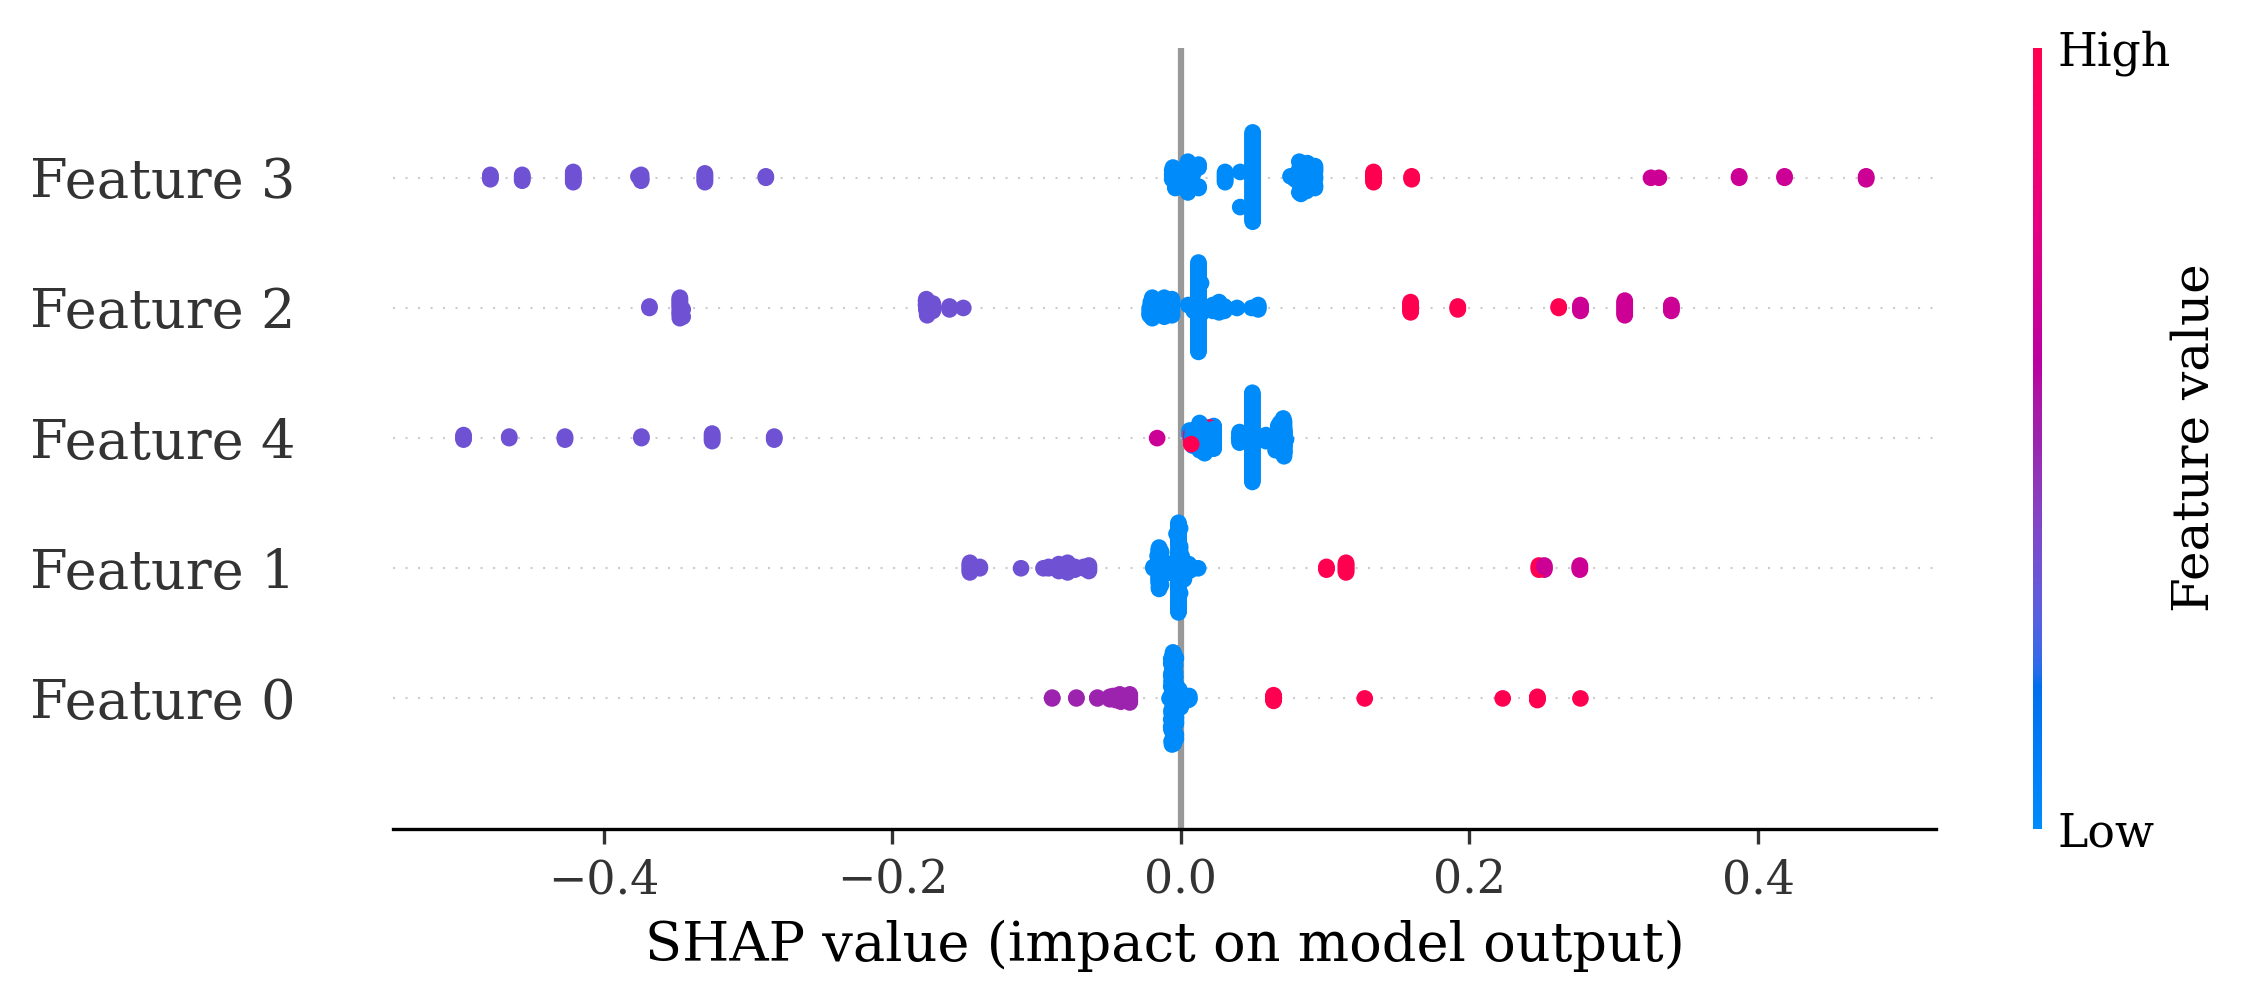

In [21]:




import shap
import matplotlib.pyplot as plt

# 设置字体和分辨率
plt.figure(dpi=300)  # 将图形分辨率设置为 300 DPI，适用于高质量打印
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})  # 调整字体大小和样式，serif 是常用的专业字体

# 绘制 SHAP 值的总结图，只针对第一个输出类
shap.summary_plot(shap_values[:, :, 0],data_for_shap, show=False)  # 设置 show=False，以便自定义图形后再显示

plt.show()  # 显示图形

In [65]:


# 选择前五个序列作为解释数据
data_for_shap_subset = data_for_shap[:, :5]

# 使用 KernelExplainer 创建解释器
explainer = shap.KernelExplainer(model.predict, data_for_shap_subset)

# 计算 SHAP 值
shap_values = explainer.shap_values(data_for_shap_subset)

# 将数值序列转换为字符串列表（模拟文本）
string_sequence = [str(x) for x in data_for_shap_subset[0]]
shap_values_for_first_class = shap_values[0]
# 确保 SHAP 值的数量与输入数据长度一致
shap_values_text = shap.Explanation(
    values=shap_values_for_first_class[:,0],  # 一维数组，确保长度与输入匹配
    base_values=explainer.expected_value[0],
    data=string_sequence
)

# 使用 SHAP 绘制数值序列的解释，将其作为“文本”处理
shap.plots.text(shap_values_text)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
188/188 ━━━━━━

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━

In [67]:
from IPython.core.display import HTML
shap.plots.text(shap_values_text)

shap_html = shap.plots.text(shap_values_text)

# 使用 IPython 的 HTML 方法保存输出
with open("shap_text_plot.html", "w", encoding="utf-8") as file:
    file.write(str(HTML(shap_html)))

In [13]:
import pandas as pd

columns = ['F1','F2','F3','F4','F5']
data = pd.DataFrame(X_train[:200], columns=columns)  # Adjusted to match 100 samples

# 假设 shap_values 是包含 100 个样本的 SHAP 值数组
# 选择正类的 SHAP 值（假设是第二个数组）
shap_values_positive_class = shap_values[:, :, 0]  # 选择第2列（对应正类）

# 将正类的 SHAP 值转换为 DataFrame
shap_df = pd.DataFrame(shap_values_positive_class, columns=['SHAP F1', 'SHAP F2', 'SHAP F3', 'SHAP F4', 'SHAP F5'])

# 合併原始數據和 SHAP 值
combined_df = pd.concat([data, shap_df], axis=1)

# 保存合併後的 DataFrame 到 CSV 文件
combined_df.to_csv('combined_data_shap.csv', index=False)

combined_df

,F1,F2,F3,F4,F5,SHAP F1,SHAP F2,SHAP F3,SHAP F4,SHAP F5
0,2,1,3,1,1,-0.020421,-0.004009,0.318693,0.092855,0.071798
1,1,1,2,1,1,-0.013204,-0.029643,-0.336141,0.008212,0.026012
2,1,1,1,1,1,-0.011029,-0.011686,0.004399,0.047299,0.045990
3,2,1,2,1,2,-0.030961,-0.022784,-0.172803,-0.004232,-0.281794
4,1,1,3,1,1,-0.004692,-0.005310,0.296290,0.092360,0.071180
...,...,...,...,...,...,...,...,...,...,...
195,1,1,2,1,2,-0.009668,-0.018864,-0.171147,-0.001191,-0.311333
196,1,1,2,1,1,-0.013204,-0.029643,-0.336141,0.008212,0.026012
197,1,1,1,1,1,-0.011029,-0.011686,0.004399,0.047299,0.045990
198,1,1,2,2,1,-0.008902,-0.023167,-0.165336,-0.324923,0.011056


In [16]:
print(combined_df.columns)
max_index = combined_df['SHAP F1'].idxmax()
print(max_index)
combined_df.loc[19]

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'SHAP F1', 'SHAP F2', 'SHAP F3',
       'SHAP F4', 'SHAP F5'],
      dtype='object')
181


F1         1.000000
F2         2.000000
F3         3.000000
F4         1.000000
F5         1.000000
SHAP F1   -0.004120
SHAP F2   -0.046681
SHAP F3    0.348934
SHAP F4    0.087049
SHAP F5    0.069748
Name: 19, dtype: float64

In [ ]:
print(combined_df.columns)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'SHAP F1', 'SHAP F2', 'SHAP F3',
       'SHAP F4', 'SHAP F5'],
      dtype='object')


In [ ]:
# 转换数据表为所需格式的 transactions
transactions = []
for _, row in combined_df.iterrows():
    transaction = []
    for i in range(1, 6):
        feature = str(int(row[f'F{i}']))  # 將特徵值轉換為整數然後轉為字符串
        shap_value = row[f'SHAP F{i}']
        transaction.append((feature, shap_value))
    transactions.append(transaction)

transactions

[[('2', 0.03079157498390335),
  ('1', 0.004392873566644244),
  ('3', -0.29591136390897244),
  ('1', -0.1117283304817511),
  ('1', -0.09065971541842444)],
 [('1', 0.012790566792169),
  ('1', 0.03145557442020293),
  ('2', 0.3416313960082685),
  ('1', -0.009467610788299607),
  ('1', -0.03090958688656459)],
 [('1', 0.007041716254673516),
  ('1', 0.011191201956524281),
  ('1', -0.00043348094738653096),
  ('1', -0.055797254594462664),
  ('1', -0.06026468196405703)],
 [('2', 0.03723089078630643),
  ('1', 0.03144800355660895),
  ('2', 0.1645169190564522),
  ('1', 0.006311948599011736),
  ('2', 0.2533539156859772)],
 [('1', 0.0018637043610679456),
  ('1', 0.007069036440505071),
  ('3', -0.269371612812499),
  ('1', -0.11179358553307525),
  ('1', -0.09120573225263551)],
 [('2', 0.06547610491696527),
  ('2', 0.09351203865550224),
  ('1', -0.007342693843296984),
  ('3', -0.41148165113575796),
  ('1', -0.0775932878106445)],
 [('1', 0.0158650748405219),
  ('2', 0.07483297622789285),
  ('1', 0.0315205

In [ ]:
# 計算給定序列在單個交易中的實用性
def utility_of_sequence_in_transaction(sequence, transaction):
    utility = 0
    for item in sequence:
        for trans_item, item_utility in transaction:
            if item == trans_item:
                utility += item_utility
                break
    return utility

# 檢查序列是否按順序出現在交易中
def is_sequence_in_transaction(sequence, transaction):
    if not sequence:
        return False
    seq_index = 0
    for trans_item, _ in transaction:
        if trans_item == sequence[seq_index]:
            seq_index += 1
            if seq_index == len(sequence):
                return True
    return False

# 計算序列的總實用性
def calculate_total_utility(sequence, transactions):
    total_utility = 0
    for transaction in transactions:
        if is_sequence_in_transaction(sequence, transaction):
            total_utility += utility_of_sequence_in_transaction(sequence, transaction)
    return total_utility

# 生成所有可能的項目序列
def generate_sequences(items):
    if not items:
        return []
    sequences = [[item] for item in items]
    for i in range(len(items)):
        for subsequence in generate_sequences(items[i + 1:]):
            sequences.append([items[i]] + subsequence)
    return sequences

# 找出具有最高實用性的序列
def find_highest_utility_sequence(transactions):
    items = set()
    for transaction in transactions:
        for item, _ in transaction:
            items.add(item)

    sequences = generate_sequences(list(items))
    highest_utility = 0
    best_sequence = None
    for sequence in sequences:
        utility = calculate_total_utility(sequence, transactions)
        if utility > highest_utility:
            highest_utility = utility
            best_sequence = sequence

    return best_sequence, highest_utility

# 找到最高實用性的序列
best_sequence, highest_utility = find_highest_utility_sequence(transactions)

# 輸出結果
best_sequence, highest_utility

(['2'], 38.17158675534848)

In [ ]:
# 修改代碼以找出具有最高實用性的前K個序列

def find_top_k_utility_sequences(transactions, k):
    items = set()
    for transaction in transactions:
        for item, _ in transaction:
            items.add(item)

    sequences = generate_sequences(list(items))
    sequence_utilities = []
    for sequence in sequences:
        utility = calculate_total_utility(sequence, transactions)
        sequence_utilities.append((sequence, utility))

    # 根據實用性值進行降序排序並取前K個
    top_k_sequences = sorted(sequence_utilities, key=lambda x: x[1], reverse=True)[:k]
    return top_k_sequences

# 找到最高實用性的前K個序列
k = 20  # 您可以修改這個值來改變取前多少個序列
top_k_sequences = find_top_k_utility_sequences(transactions, k)

# 輸出結果
top_k_sequences

[(['2'], 38.17158675534848),
 (['2', '1'], 36.925313450283056),
 (['1'], 3.742380176630847),
 (['2', '4'], 0),
 (['2', '1', '4'], 0),
 (['2', '1', '3', '4'], 0),
 (['2', '3', '4'], 0),
 (['1', '3', '4'], 0),
 (['3', '4'], 0),
 (['1', '4'], -3.87653562285746),
 (['4'], -6.72003845782889),
 (['2', '1', '3'], -8.02586594151142),
 (['2', '3'], -15.050848229685007),
 (['1', '3'], -21.679352600291566),
 (['3'], -28.361543136996612)]

In [21]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 加载数据
df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\sampled_dataset.csv')
pool_df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\remaining_dataset.csv')  # 加载数据池

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)
pool_df['trajectory'] = pool_df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')
y = to_categorical(df['Churn'].values)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Active Learning 循环
n_iterations = 6
n_samples = 1000

# 创建新模型（或者您也可以重用旧模型）
#model = Sequential()
#model.add(Embedding(input_dim=100, output_dim=20, input_length=early_window))
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=30, validation_split=0.1)
for iteration in range(n_iterations):
    # 随机选择数据池中的样本
    sample_indices = np.random.choice(pool_df.index, n_samples, replace=False)
    sample_df = pool_df.loc[sample_indices]
    pool_df = pool_df.drop(sample_indices)
    # 从数据池中移除已选样本
    #pool_df = pool_df.drop(selected_samples.index).reset_index(drop=True)
    # 准备新增数据
    X_new = pad_sequences(sample_df['trajectory'], maxlen=early_window, padding='post')
    y_new = to_categorical(sample_df['Churn'].values)

    # 更新训练集
    X_train = np.concatenate((X_train, X_new))
    y_train = np.concatenate((y_train, y_new))
    

    # 训练模型
    model = Sequential()
    model.add(Embedding(input_dim=200, output_dim=40))  # 增加 input_dim 和 output_dim
    model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
    model.add(Dropout(0.2))  # 添加 Dropout
    model.add(BatchNormalization())  # 添加 BatchNormalization
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(2, activation='softmax'))

# 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 早停
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 训练模型，包括早停回调
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

    # 测试模型
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Iteration {iteration+1}, Test Accuracy: {accuracy:.4f}')


ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 5}

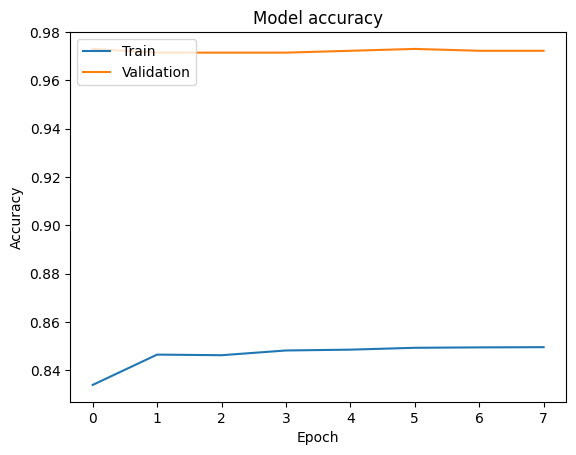

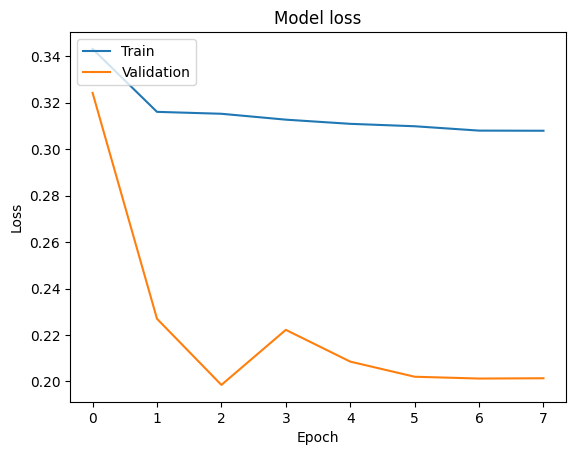

In [13]:
# Plotting training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

94/94 [==============================] - 1s 4ms/step


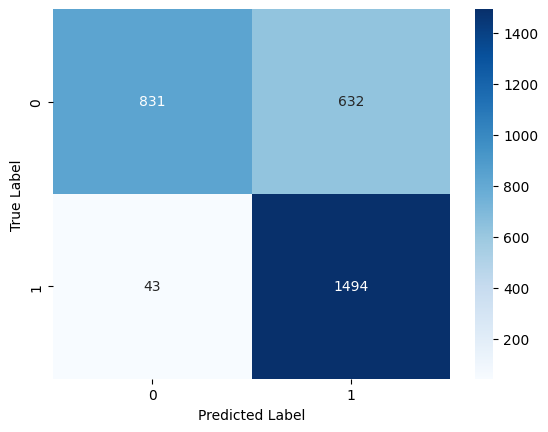

              precision    recall  f1-score   support

           0       0.95      0.57      0.71      1463
           1       0.70      0.97      0.82      1537

    accuracy                           0.78      3000
   macro avg       0.83      0.77      0.76      3000
weighted avg       0.82      0.78      0.76      3000



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc

# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")




94/94 [==============================] - 1s 5ms/step
Precision: 0.7027
Recall: 0.9720
F1 Score: 0.8157
Matthews Correlation Coefficient: 0.5941
Accuracy: 0.7750
AUC: 0.9104
PR AUC: 0.9236


AUC: 0.9128


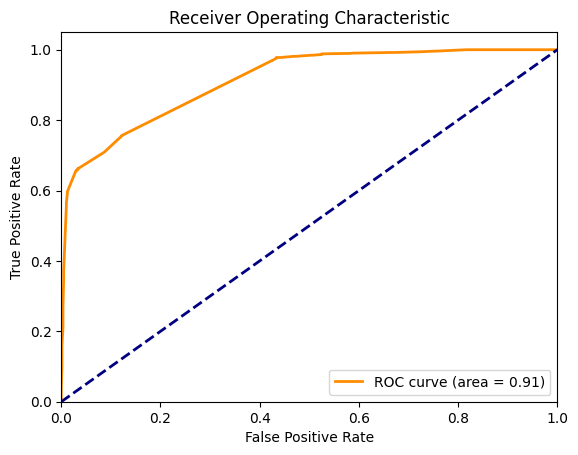

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 假设 y_true 是您的真实标签和 y_pred_probs 是模型预测的概率
# 例如：y_true = [0, 1, 1, 0, 1] 和 y_pred_probs = [0.1, 0.9, 0.8, 0.3, 0.7]

# 计算AUC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC: {auc:.4f}")

# 计算ROC曲线的坐标
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.stats import entropy

# 加载数据
df = pd.read_csv('sampled_dataset.csv')
pool_df = pd.read_csv('remaining_dataset.csv')  # 加载数据池

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)
pool_df['trajectory'] = pool_df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')
y = to_categorical(df['Churn'].values)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Active Learning 循环
n_iterations = 6
n_samples = 1000


for iteration in range(n_iterations):

    # 从数据池中计算不确定性并选择样本
    pool_X = pad_sequences(pool_df['trajectory'], maxlen=early_window, padding='post')
    pool_probabilities = model.predict(pool_X)
    pool_uncertainties = entropy(pool_probabilities.T)
    most_uncertain_indices = np.argsort(pool_uncertainties)[-n_samples:]
    sample_df = pool_df.iloc[most_uncertain_indices]
    pool_df = pool_df.drop(most_uncertain_indices).reset_index(drop=True)  # 重置索引

    # 准备新增数据
    X_new = pad_sequences(sample_df['trajectory'], maxlen=early_window, padding='post')
    y_new = to_categorical(sample_df['Churn'].values)

    # 更新训练集
    X_train = np.concatenate((X_train, X_new))
    y_train = np.concatenate((y_train, y_new))

    # 训练模型
    model = Sequential()
    model.add(Embedding(input_dim=200, output_dim=40, input_length=early_window))  # 增加 input_dim 和 output_dim
    model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
    model.add(Dropout(0.2))  # 添加 Dropout
    model.add(BatchNormalization())  # 添加 BatchNormalization
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(2, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 早停
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # 训练模型，包括早停回调
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

    # 测试模型
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Iteration {iteration+1}, Test Accuracy: {accuracy:.4f}')

12101/12101 [==============================] - 64s 5ms/step
Epoch 1/50
225/225 [==============================] - 8s 17ms/step - loss: 0.4000 - accuracy: 0.7853 - val_loss: 0.9312 - val_accuracy: 0.2512
Epoch 2/50
225/225 [==============================] - 3s 14ms/step - loss: 0.3658 - accuracy: 0.7997 - val_loss: 1.7919 - val_accuracy: 0.0225
Epoch 3/50
225/225 [==============================] - 3s 14ms/step - loss: 0.3609 - accuracy: 0.7944 - val_loss: 1.9965 - val_accuracy: 0.0225
Epoch 4/50
225/225 [==============================] - 3s 13ms/step - loss: 0.3586 - accuracy: 0.7997 - val_loss: 1.3182 - val_accuracy: 0.3375
Epoch 5/50
225/225 [==============================] - 3s 12ms/step - loss: 0.3571 - accuracy: 0.8017 - val_loss: 2.1691 - val_accuracy: 0.0275
Epoch 6/50
94/94 [==============================] - 2s 7ms/step - loss: 0.3563 - accuracy: 0.8070
Iteration 1, Test Accuracy: 0.8070
12070/12070 [==============================] - 63s 5ms/step
Epoch 1/50
254/254 [============

In [ ]:
X_train.shape

(17500, 5)

94/94 [==============================] - 1s 4ms/step


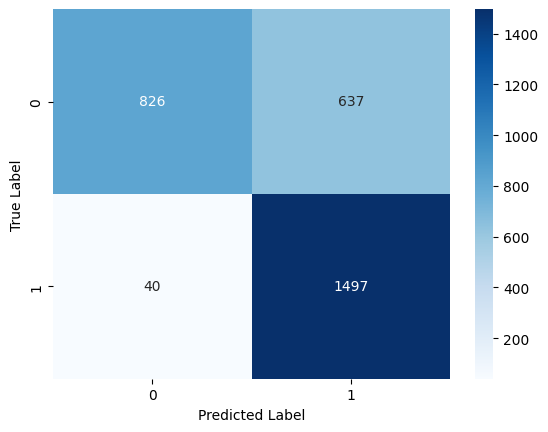

              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1463
           1       0.70      0.97      0.82      1537

    accuracy                           0.77      3000
   macro avg       0.83      0.77      0.76      3000
weighted avg       0.82      0.77      0.76      3000

94/94 [==============================] - 0s 4ms/step
Precision: 0.7015
Recall: 0.9740
F1 Score: 0.8156
Matthews Correlation Coefficient: 0.5941
Accuracy: 0.7743
AUC: 0.9072
PR AUC: 0.9209


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)


# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def contains_sequence(trajectory, sequence):
    """检查序列中是否存在指定的数字组合"""
    for i in range(len(trajectory) - len(sequence) + 1):
        if trajectory[i:i + len(sequence)] == sequence:
            return True
    return False
# 加载数据
df = pd.read_csv('sampled_dataset.csv')
pool_df = pd.read_csv('remaining_dataset.csv')  # 加载数据池

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)
pool_df['trajectory'] = pool_df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')
y = to_categorical(df['Churn'].values)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Active Learning 循环
n_iterations = 6
n_samples = 1000



for iteration in range(n_iterations):


   # 从数据池中筛选出包含数字 2 的样本
    contains_2 = pool_df['trajectory'].apply(lambda x: 2 in x[:5])
    selected_samples_2 = pool_df[contains_2]

    # 如果样本数量不足，再筛选出包含序列 [2, 1] 的样本
    if len(selected_samples_2) < n_samples:
        contains_2_1 = pool_df['trajectory'].apply(lambda x: contains_sequence(x[:5], [2, 1]))
        selected_samples_2_1 = pool_df[contains_2_1]
        # 合并两组样本，但总数不超过n_samples
        selected_samples = pd.concat([selected_samples_2, selected_samples_2_1]).head(n_samples)
    else:
        selected_samples = selected_samples_2.head(n_samples)
    # 检查是否有选中的样本
    if selected_samples.empty:
        print("没有找到符合条件的样本。")
        continue  # 跳过当前迭代

    # 从数据池中移除已选样本
    pool_df = pool_df.drop(selected_samples.index).reset_index(drop=True)

    # 准备新增数据
    X_new = pad_sequences(selected_samples['trajectory'], maxlen=early_window, padding='post')
    y_new = to_categorical(selected_samples['Churn'].values)

    # 更新训练集
    X_train = np.concatenate((X_train, X_new))
    y_train = np.concatenate((y_train, y_new))
    # 训练模型
     # 训练模型
    model = Sequential()
    model.add(Embedding(input_dim=200, output_dim=40, input_length=early_window))  # 增加 input_dim 和 output_dim
    model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
    model.add(Dropout(0.2))  # 添加 Dropout
    model.add(BatchNormalization())  # 添加 BatchNormalization
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(2, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 早停
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # 训练模型，包括早停回调
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])
    # 测试模型
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Iteration {iteration+1}, Test Accuracy: {accuracy:.4f}')


Epoch 1/50
225/225 [==============================] - 7s 13ms/step - loss: 0.3820 - accuracy: 0.8075 - val_loss: 0.5852 - val_accuracy: 0.7975
Epoch 2/50
225/225 [==============================] - 2s 10ms/step - loss: 0.3498 - accuracy: 0.8222 - val_loss: 0.2628 - val_accuracy: 0.8850
Epoch 3/50
225/225 [==============================] - 3s 13ms/step - loss: 0.3438 - accuracy: 0.8288 - val_loss: 0.2601 - val_accuracy: 0.8487
Epoch 4/50
225/225 [==============================] - 2s 9ms/step - loss: 0.3401 - accuracy: 0.8268 - val_loss: 0.1932 - val_accuracy: 0.8863
Epoch 5/50
225/225 [==============================] - 2s 9ms/step - loss: 0.3386 - accuracy: 0.8257 - val_loss: 0.1887 - val_accuracy: 0.8875
Epoch 6/50
225/225 [==============================] - 2s 9ms/step - loss: 0.3373 - accuracy: 0.8293 - val_loss: 0.2035 - val_accuracy: 0.8863
Epoch 7/50
225/225 [==============================] - 2s 9ms/step - loss: 0.3366 - accuracy: 0.8278 - val_loss: 0.2240 - val_accuracy: 0.8487
Epo

94/94 [==============================] - 2s 6ms/step


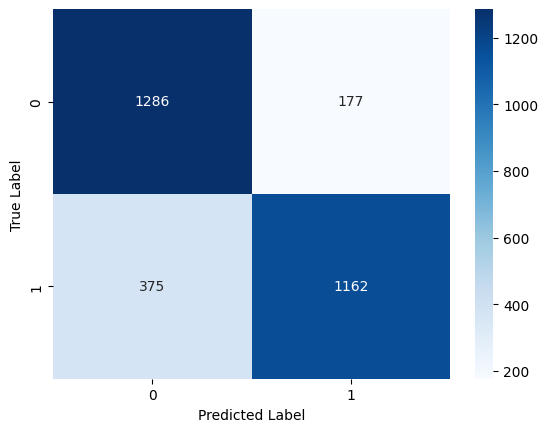

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1463
           1       0.87      0.76      0.81      1537

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000

94/94 [==============================] - 0s 4ms/step
Precision: 0.8678
Recall: 0.7560
F1 Score: 0.8081
Matthews Correlation Coefficient: 0.6385
Accuracy: 0.8160
AUC: 0.9127
PR AUC: 0.9261


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)


# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")


In [9]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def contains_sequence(trajectory, sequence):
    """检查序列中是否存在指定的数字组合"""
    for i in range(len(trajectory) - len(sequence) + 1):
        if trajectory[i:i + len(sequence)] == sequence:
            return True
    return False
# 加载数据
df = pd.read_csv('sampled_dataset.csv')
pool_df = pd.read_csv('remaining_dataset.csv')  # 加载数据池

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)
pool_df['trajectory'] = pool_df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')
y = to_categorical(df['Churn'].values)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Active Learning 循环
n_iterations = 6
n_samples = 1000



for iteration in range(n_iterations):


   # 从数据池中筛选出包含数字 2 的样本
    contains_2 = pool_df['trajectory'].apply(lambda x: 3 in x[:5])
    selected_samples_2 = pool_df[contains_2]

    # 如果样本数量不足，再筛选出包含序列 [2, 1] 的样本
    if len(selected_samples_2) < n_samples:
        contains_2_1 = pool_df['trajectory'].apply(lambda x: contains_sequence(x[:5], [3, 1]))
        selected_samples_2_1 = pool_df[contains_2_1]
        # 合并两组样本，但总数不超过n_samples
        selected_samples = pd.concat([selected_samples_2, selected_samples_2_1]).head(n_samples)
    else:
        selected_samples = selected_samples_2.head(n_samples)
    # 检查是否有选中的样本
    if selected_samples.empty:
        print("没有找到符合条件的样本。")
        continue  # 跳过当前迭代

    # 从数据池中移除已选样本
    pool_df = pool_df.drop(selected_samples.index).reset_index(drop=True)

    # 准备新增数据
    X_new = pad_sequences(selected_samples['trajectory'], maxlen=early_window, padding='post')
    y_new = to_categorical(selected_samples['Churn'].values)

    # 更新训练集
    X_train = np.concatenate((X_train, X_new))
    y_train = np.concatenate((y_train, y_new))
    # 训练模型
     # 训练模型
    model = Sequential()
    model.add(Embedding(input_dim=200, output_dim=40, input_length=early_window))  # 增加 input_dim 和 output_dim
    model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
    model.add(Dropout(0.2))  # 添加 Dropout
    model.add(BatchNormalization())  # 添加 BatchNormalization
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(2, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 早停
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # 训练模型，包括早停回调
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])
    # 测试模型
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Iteration {iteration+1}, Test Accuracy: {accuracy:.4f}')


Epoch 1/50
225/225 [==============================] - 8s 17ms/step - loss: 0.4004 - accuracy: 0.8003 - val_loss: 0.6876 - val_accuracy: 0.5350
Epoch 2/50
225/225 [==============================] - 4s 17ms/step - loss: 0.3680 - accuracy: 0.8171 - val_loss: 0.8445 - val_accuracy: 0.5188
Epoch 3/50
225/225 [==============================] - 3s 13ms/step - loss: 0.3638 - accuracy: 0.8181 - val_loss: 0.9255 - val_accuracy: 0.5575
Epoch 4/50
225/225 [==============================] - 3s 13ms/step - loss: 0.3596 - accuracy: 0.8204 - val_loss: 0.8664 - val_accuracy: 0.5863
Epoch 5/50
225/225 [==============================] - 3s 13ms/step - loss: 0.3613 - accuracy: 0.8189 - val_loss: 1.0057 - val_accuracy: 0.5738
Epoch 6/50
94/94 [==============================] - 1s 5ms/step - loss: 0.3685 - accuracy: 0.8103
Iteration 1, Test Accuracy: 0.8103
Epoch 1/50
254/254 [==============================] - 10s 17ms/step - loss: 0.4378 - accuracy: 0.7758 - val_loss: 0.5737 - val_accuracy: 0.7111
Epoch 2/

94/94 [==============================] - 1s 4ms/step


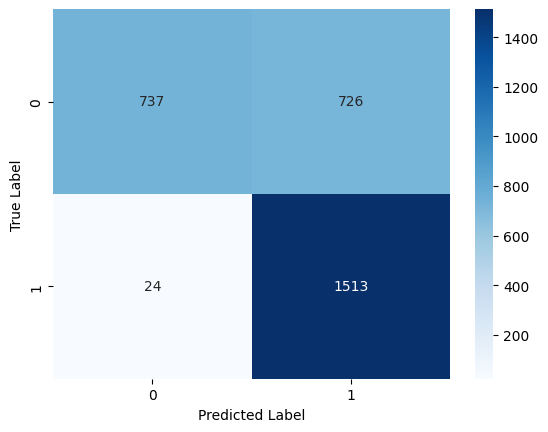

              precision    recall  f1-score   support

           0       0.97      0.50      0.66      1463
           1       0.68      0.98      0.80      1537

    accuracy                           0.75      3000
   macro avg       0.82      0.74      0.73      3000
weighted avg       0.82      0.75      0.73      3000

94/94 [==============================] - 1s 6ms/step
Precision: 0.6757
Recall: 0.9844
F1 Score: 0.8014
Matthews Correlation Coefficient: 0.5608
Accuracy: 0.7500
AUC: 0.9004
PR AUC: 0.9167


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)


# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")


In [17]:
import pandas as pd
import numpy as np
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy.stats import entropy
def contains_sequence(trajectory, sequence):
    """检查序列中是否存在指定的数字组合"""
    for i in range(len(trajectory) - len(sequence) + 1):
        if trajectory[i:i + len(sequence)] == sequence:
            return True
    return False
# 加载数据
df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\sampled_dataset.csv')
pool_df = pd.read_csv(r'C:\Users\ycw\OneDrive - Høgskulen på Vestlandet\Desktop\Dataset\Clickstream\Coveo\50%\remaining_dataset.csv')  # 加载数据池

# 将轨迹字符串转换为列表
df['trajectory'] = df['trajectory'].apply(ast.literal_eval)
pool_df['trajectory'] = pool_df['trajectory'].apply(ast.literal_eval)

# 固定序列长度 (早期窗口)
early_window = 5
X = pad_sequences(df['trajectory'], maxlen=early_window, padding='post')
y = to_categorical(df['Churn'].values)  # 转换为分类格式

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Active Learning 循环
n_iterations = 6
n_samples = 1000



for iteration in range(n_iterations):


   # 从数据池中筛选出包含数字 3 的样本
    contains_2 = pool_df['trajectory'].apply(lambda x: 3 in x[:5])
    selected_samples_2 = pool_df[contains_2]

    # 如果样本数量不足，再筛选出包含序列 [2, 1] 的样本
    if len(selected_samples_2) < n_samples:
        contains_2_1 = pool_df['trajectory'].apply(lambda x: contains_sequence(x[:5], [2, 1]))
        selected_samples_2_1 = pool_df[contains_2_1]
        # 合并两组样本，但总数不超过n_samples
        selected_samples = pd.concat([selected_samples_2, selected_samples_2_1]).head(n_samples)
    else:
        selected_samples = selected_samples_2.head(n_samples)
    # 检查是否有选中的样本
    if selected_samples.empty:
        print("没有找到符合条件的样本。")
        continue  # 跳过当前迭代

    # 从数据池中移除已选样本
    pool_df = pool_df.drop(selected_samples.index).reset_index(drop=True)

    # 准备新增数据
    X_new = pad_sequences(selected_samples['trajectory'], maxlen=early_window, padding='post')
    y_new = to_categorical(selected_samples['Churn'].values)

    # 更新训练集
    X_train = np.concatenate((X_train, X_new))
    y_train = np.concatenate((y_train, y_new))
    # 训练模型
     # 训练模型
    model = Sequential()
    model.add(Embedding(input_dim=200, output_dim=40))  # 增加 input_dim 和 output_dim
    model.add(LSTM(100, return_sequences=True))  # 增加 LSTM 单元
    model.add(Dropout(0.2))  # 添加 Dropout
    model.add(BatchNormalization())  # 添加 BatchNormalization
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(2, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 早停
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # 训练模型，包括早停回调
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])
    # 测试模型
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Iteration {iteration+1}, Test Accuracy: {accuracy:.4f}')

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7752 - loss: 0.4435 - val_accuracy: 0.4712 - val_loss: 0.7389
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8103 - loss: 0.3649 - val_accuracy: 0.5425 - val_loss: 0.8432
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8249 - loss: 0.3596 - val_accuracy: 0.5550 - val_loss: 0.8845
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8218 - loss: 0.3589 - val_accuracy: 0.5625 - val_loss: 0.8566
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8239 - loss: 0.3489 - val_accuracy: 0.5625 - val_loss: 0.8728
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8234 - loss: 0.3538 - val_accuracy: 0.5550 - val_loss: 0.9638
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8095 - loss: 0.3625
Iteration 1, Test Accuracy: 0.8063
Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7496 - loss: 0.4792 - val_accuracy: 0.5667 - val_

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


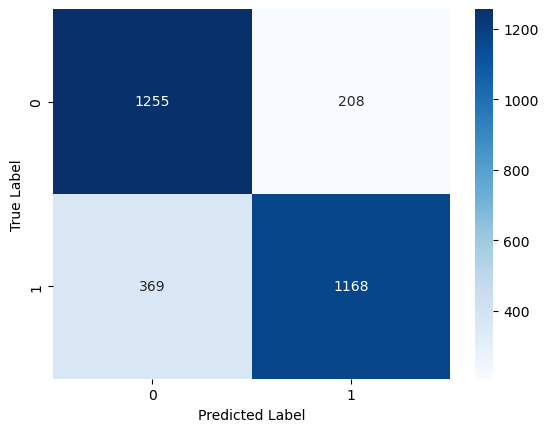

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1463
           1       0.85      0.76      0.80      1537

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Precision: 0.8488
Recall: 0.7599
F1 Score: 0.8019
Matthews Correlation Coefficient: 0.6197
Accuracy: 0.8077
AUC: 0.9094
PR AUC: 0.9227


In [18]:
##SHAP

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict classes using the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report, which includes precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print(report)


# 假设 y_true 和 y_pred_classes 是您的真实标签和预测标签
# y_true = [Your true labels]
# y_pred_classes = [Your predicted labels]
y_pred_probs = model.predict(X_test)  # 模型预测的概率

# 由于 y_pred_probs 是一个形状为 (n_samples, 2) 的数组，我们需要选取代表正类概率的列
y_pred_probs = y_pred_probs[:, 1]  # 选择正类（索引为 1）的概率

# 计算度量指标
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
mcc = matthews_corrcoef(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
auc_score = roc_auc_score(y_true, y_pred_probs)  # 使用正类的概率计算 AUC

# 计算 PR AUC
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
pr_auc = auc(recall_vals, precision_vals)

# 打印度量指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"PR AUC: {pr_auc:.4f}")